In [1]:
# matplotlib設定用コート
# matplotlibに描画する度に（, fontproperties=font）引数を指定する。
# なぜか設定ファイルはきかない。。。
import os
from matplotlib import pyplot as plt, font_manager

font_manager._rebuild()
font_dir = font_manager.win32FontDirectory()
font_path = os.path.join(font_dir, 'SourceHanCodeJP-Regular.otf')
font = font_manager.FontProperties(fname=font_path, size=14)

### 文字の数え方
- 英語
- 日本語
 - 日本語の読み出しは、青空文庫のテキストを活用する。
- 1文の文字量を計算する。
 - 文章を文に区切る。英語であればnltk.tokenize.sent_tokenize(text)が便利。
 - 日本語は英語ほど簡単に文を切り出せないため、個別のロジックが必要。

In [32]:
# 文字の出現頻度の出し方：Coutner()
# Counterクラスを使うと、キーに文字、値に出現頻度をまとめる辞書型が得られる。
from collections import Counter
string = "This is a pen."
cnt = Counter(string)
print(cnt)
print( '"i"のtf:', cnt['i'] )

Counter({' ': 3, 'i': 2, 's': 2, 'T': 1, 'h': 1, 'a': 1, 'p': 1, 'e': 1, 'n': 1, '.': 1})
"i"のtf: 2


In [6]:
# 青空文庫のデータ読み出しスクリプト
# ルビなどのタグ情報を削除するAozora.pyファイルを使う。
from aozora import Aozora
aozora = Aozora('D:/1.programming/python/PythonTextMining/Data/773_ruby_5968/kokoro.txt')
c = 0
for u in aozora.read():
    print(u)
    c += 1
    if c == 12: #全編は長いので途中で止める。
        break

こころ
夏目漱石


上　先生と私


一

　私はその人を常に先生と呼んでいた。だからここでもただ先生と書くだけで本名は打ち明けない。これは世間を憚かる遠慮というよりも、その方が私にとって自然だからである。私はその人の記憶を呼び起すごとに、すぐ「先生」といいたくなる。筆を執っても心持は同じ事である。よそよそしい頭文字などはとても使う気にならない。
　私が先生と知り合いになったのは鎌倉である。その時私はまだ若々しい書生であった。暑中休暇を利用して海水浴に行った友達からぜひ来いという端書を受け取ったので、私は多少の金を工面して、出掛ける事にした。私は金の工面に二、三日を費やした。ところが私が鎌倉に着いて三日と経たないうちに、私を呼び寄せた友達は、急に国元から帰れという電報を受け取った。電報には母が病気だからと断ってあったけれども友達はそれを信じなかった。友達はかねてから国元にいる親たちに勧まない結婚を強いられていた。彼は現代の習慣からいうと結婚するにはあまり年が若過ぎた。それに肝心の当人が気に入らなかった。それで夏休みに当然帰るべきところを、わざと避けて東京の近くで遊んでいたのである。彼は電報を私に見せてどうしようと相談をした。私にはどうしていいか分らなかった。けれども実際彼の母が病気であるとすれば彼は固より帰るべきはずであった。それで彼はとうとう帰る事になった。せっかく来た私は一人取り残された。
　学校の授業が始まるにはまだ大分日数があるので鎌倉におってもよし、帰ってもよいという境遇にいた私は、当分元の宿に留まる覚悟をした。友達は中国のある資産家の息子で金に不自由のない男であったけれども、学校が学校なのと年が年なので、生活の程度は私とそう変りもしなかった。したがって一人ぼっちになった私は別に恰好な宿を探す面倒ももたなかったのである。


In [33]:
# -*- coding: utf-8 -*-
# 4.1.1節 文字の出現頻度  青空文庫のテキストを取り込んで、文字の出現回数を数える
from collections import Counter
from aozora import Aozora
aozora = Aozora("wagahaiwa_nekodearu.txt")
 
# 文字ごとの出現頻度を調べる
string = '\n'.join(aozora.read())  # パラグラフをすべて結合して1つの文字列にする
cnt = Counter(string)
# 頻度順にソートして出力する
print(sorted(cnt.items(), key=lambda x: x[1], reverse=True)[:50])

[('の', 12476), ('い', 10299), ('る', 8725), ('て', 8601), ('な', 8571), ('と', 8113), ('に', 7616), ('。', 7486), ('か', 7303), ('し', 6947), ('は', 6879), ('、', 6773), ('で', 6227), ('た', 6131), ('を', 6119), ('が', 6000), ('っ', 5629), ('ら', 5552), ('う', 5326), ('も', 5220), ('ん', 4015), ('だ', 3905), ('あ', 3902), ('す', 3680), ('く', 3328), ('れ', 3279), ('ま', 3273), ('「', 3238), ('」', 3238), ('り', 3060), ('こ', 2684), ('そ', 2464), ('\n', 2340), ('人', 2287), ('よ', 2152), ('え', 1829), ('さ', 1733), ('事', 1491), ('云', 1423), ('ど', 1404), ('け', 1392), ('君', 1315), ('ろ', 1308), ('や', 1300), ('き', 1294), ('出', 1233), ('見', 1216), ('つ', 1174), ('ち', 1121), ('へ', 1097)]


In [35]:
# -*- coding: utf-8 -*-
# 4.1.2 テキストを文ごとに分割する
# nltk.sent_tokenize(text)の区切り方を確認する。なかなか賢い。
import nltk
from nltk.corpus import inaugural
text = inaugural.raw('1789-Washington.txt')[:775]
sents = nltk.tokenize.sent_tokenize(text)
for u in sents: #><で囲まれている範囲が切り出した文である。
    print('>'+u+'<')

>Fellow-Citizens of the Senate and of the House of Representatives:

Among the vicissitudes incident to life no event could have filled me with greater anxieties than that of which the notification was transmitted by your order, and received on the 14th day of the present month.<
>On the one hand, I was summoned by my Country, whose voice I can never hear but with veneration and love, from a retreat which I had chosen with the fondest predilection, and, in my flattering hopes, with an immutable decision, as the asylum of my declining years -- a retreat which was rendered every day more necessary as well as more dear to me by the addition of habit to inclination, and of frequent interruptions in my health to the gradual waste committed on it by time.<
>On the other hand,<


(長さ, 頻度)の形で出力している。一例をあげると、843文字の文が1つあった、ということ。
[(843, 1), (695, 1), (692, 1), (654, 1), (572, 1), (570, 1), (515, 1), (487, 1), (477, 1), (436, 1), (369, 1), (315, 1), (279, 1), (278, 1), (230, 1), (209, 1), (183, 1), (179, 1), (169, 1), (138, 1), (119, 1), (118, 1), (63, 1)]


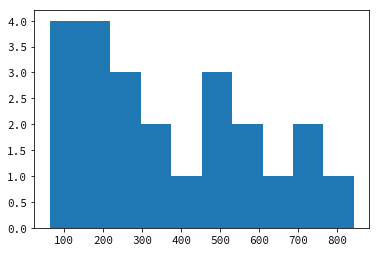

In [40]:
# -*- coding: utf-8 -*-
# 4.1.2節　テキストを文ごとに分割し文字数を数える　文への分割
import matplotlib.pyplot as plt
import numpy as np
import nltk
from nltk.corpus import inaugural
from collections import Counter
text = inaugural.raw('1789-Washington.txt')
sents = nltk.tokenize.sent_tokenize(text)   # sentsは1文ずつを要素とするリスト
# sentsの文ごとの文字数のリストを作り、Counterで頻度を数える
cnt = Counter(len(x) for x in sents)
# 頻度と長さの降順にソートして表示
print('(長さ, 頻度)の形で出力している。一例をあげると、843文字の文が1つあった、ということ。')
print(sorted(cnt.items(), key=lambda x: [x[1], x[0]], reverse=True))

nstring = np.array([len(x) for x in sents])
plt.hist(nstring)
plt.show()

頻度の多い順に文の長さを並び替えた場合：
[(14, 248), (12, 229), (17, 228), (16, 226), (13, 220), (19, 219), (15, 219), (20, 216), (22, 213), (18, 213), (10, 207), (11, 207), (21, 203), (9, 201), (23, 199), (25, 199), (27, 193), (24, 175), (26, 175), (8, 172), (28, 167), (31, 165), (29, 162), (30, 141), (33, 131), (32, 131), (34, 131), (7, 128), (35, 126), (36, 126), (37, 125), (38, 124), (42, 122), (45, 111), (39, 108), (40, 105), (43, 103), (6, 101), (41, 100), (5, 98), (44, 94), (47, 92), (49, 85), (46, 80), (48, 77), (56, 74), (50, 72), (52, 72), (51, 71), (60, 71), (55, 68), (54, 62), (57, 60), (53, 58), (4, 57), (58, 52), (63, 50), (62, 49), (65, 46), (66, 45), (59, 44), (67, 44), (68, 40), (61, 38), (70, 37), (3, 37), (64, 35), (69, 34), (72, 30), (74, 27), (77, 27), (73, 26), (76, 25), (71, 24), (82, 22), (83, 22), (78, 22), (75, 21), (79, 19), (88, 19), (81, 18), (80, 18), (84, 17), (94, 14), (85, 14), (89, 13), (101, 13), (92, 13), (95, 13), (93, 13), (98, 13), (87, 12), (91, 12), (90, 12), (96, 

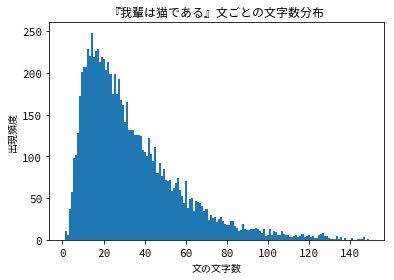

文の長さ順に並べた場合：
[(411, 1), (403, 1), (334, 1), (323, 1), (306, 1), (298, 1), (269, 1), (247, 1), (245, 1), (233, 1), (231, 1), (229, 1), (220, 1), (216, 1), (215, 1), (208, 1), (206, 1), (205, 1), (198, 1), (194, 1), (191, 1), (187, 1), (183, 1), (181, 1), (180, 2), (177, 1), (174, 1), (169, 2), (168, 2), (165, 1), (164, 1), (163, 3), (161, 1), (159, 1), (156, 2), (154, 2), (153, 2), (151, 1), (150, 1), (149, 1), (147, 3), (146, 1), (145, 1), (144, 1), (141, 2), (138, 2), (136, 3), (135, 1), (134, 4), (133, 1), (132, 1), (131, 1), (130, 2), (129, 4), (128, 5), (127, 8), (126, 7), (125, 6), (124, 2), (123, 2), (122, 4), (121, 3), (120, 6), (119, 4), (118, 3), (117, 7), (116, 5), (115, 3), (114, 6), (113, 4), (112, 3), (111, 3), (110, 6), (109, 6), (108, 7), (107, 11), (106, 6), (105, 6), (104, 9), (103, 11), (102, 6), (101, 13), (100, 6), (99, 5), (98, 13), (97, 8), (96, 11), (95, 13), (94, 14), (93, 13), (92, 13), (91, 12), (90, 12), (89, 13), (88, 19), (87, 12), (86, 10), (85, 14), (84, 

In [46]:
# -*- coding: utf-8 -*-
# 4.1.2節 テキストを文ごとに分割し文字数を数える  文ごとの文字数分布の例
from collections import Counter
import re
import numpy as np
import matplotlib.pyplot as plt
from aozora import Aozora
 
aozora = Aozora("wagahaiwa_nekodearu.txt")
 
# 文に分解してから、文ごとに文字数をカウントする
string = '\n'.join(aozora.read())
# 全角空白を取り除く。句点・改行で分割、。」の。は改行しない
string = re.split('。(?!」)|\n', re.sub('　', '', string))
while '' in string:  string.remove('')   # 空行を除く

cnt = Counter([len(x) for x in string])  # stringの要素（文）の長さをリストにする
# 文の長さを頻度順にソートして出力する
print('頻度の多い順に文の長さを並び替えた場合：')
print(sorted(cnt.items(), key=lambda x: x[1], reverse=True)[:100])

nstring = np.array([len(x) for x in string if len(x) < 150])
#print('max', nstring.max()) #ちょい紛らわしいのでコメントアウト
plt.hist(nstring, bins=nstring.max())
plt.title('『我輩は猫である』文ごとの文字数分布')
plt.xlabel('文の文字数')
plt.ylabel('出現頻度')
plt.show()

# 文の長さ順にソートして出力する
print('文の長さ順に並べた場合：')
print(sorted(cnt.items(), reverse=True)[:100]) 

average 25.55
variance 130.8475
std-deviation 11.438859208854701
6
7
7
13
16
19
20
22
23
28
28
30
30
32
33
35
35
38
43
46


D:\0.programs\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['IPAGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


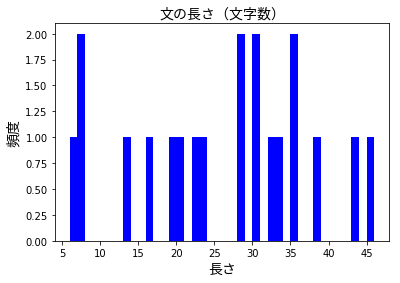

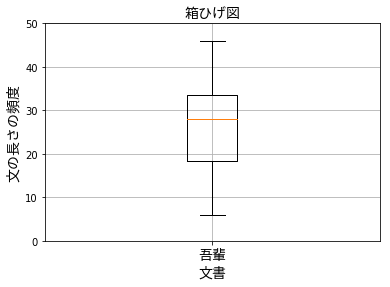

In [38]:
# -*- coding: utf-8 -*-
# リスト 3-3 『吾輩は猫である』を文に分解し、文の文字数のヒストグラム・箱ひげ図を描くプログラム
from aozora import Aozora
import re
import MeCab
import numpy as np
import matplotlib.pyplot as plt
aozora = Aozora("wagahaiwa_nekodearu.txt") #Aozoraクラスのインスタンスを作る。
 
# 文に分解する
string = '\n'.join(aozora.read()) #正規表現で置換するために文字列に直す。
# string = re.sub('　', '', string) #' 'を除外する。ただ、個人的には下1行のみで十分だと思う。
string = re.split('。(?!」)|\n', re.sub('　', '', string)) #改行キーを参考にリスト化する。
while '' in string:  string.remove('')  # 空行を除く
#m = MeCab.Tagger("-Ochasen")            # MeCabで品詞分解する
 
# 先頭20文について文単位で形態素解析し、名詞だけ抽出して、基本形を文ごとのリストにする
lengthlist = np.array( [len(v) for v in string][3:23] ) #先頭20文の文字量を計算する。
print('average', lengthlist.mean())
print('variance', lengthlist.var())
print('std-deviation', lengthlist.std())
#for u in lengthlist: print(u)           # それぞれの文の長さを、出現順に表示。見づらいのでコメントアウトする。
for u in sorted(lengthlist): print(u)   # それぞれの文の長さを、長さ順に表示

#plt.rcParams['font.family'] = 'IPAGothic'
fig = plt.figure()
plt.title('文の長さ（文字数）', fontproperties=font)
plt.xlabel('長さ', fontproperties=font)
plt.ylabel('頻度', fontproperties=font)
plt.hist(lengthlist, color='blue', bins=40)  # binsでヒストグラムの横軸区分数を指定 
plt.show()

# 箱ひげ図を作る
plt.boxplot(lengthlist)
plt.xticks([1], ['吾輩'], fontproperties=font)
plt.title('箱ひげ図', fontproperties=font)
plt.grid()
plt.xlabel('文書', fontproperties=font)
plt.ylabel('文の長さの頻度', fontproperties=font)
plt.ylim([0,50])
plt.show()

### 単語毎の出現頻度（tf）
- 英語の場合、空白区切りで単語を区切り、出現頻度を数える。
- 日本語の場合、形態素解析器（以下、MeCab）を用いて出現頻度を数える。
 - 文章全体の含まれる形態素のtfを計測する。
 - 文章を1文に区切り、1文に含まれる形態素数を計測する。

1文に含まれる形態素数（頻度順）：ワシントン大統領の演説
[(140, 1), (112, 1), (110, 1), (104, 1), (93, 1), (91, 1), (89, 1), (88, 1), (81, 1), (69, 1), (63, 1), (51, 1), (47, 1), (46, 1), (41, 1), (38, 1), (34, 1), (30, 1), (29, 1), (25, 1), (20, 1), (19, 1), (11, 1)]
1文に含まれる形態素数（頻度順）：ケネディ大統領の演説
[(7, 5), (25, 4), (21, 3), (19, 3), (14, 3), (11, 3), (67, 2), (44, 2), (40, 2), (36, 2), (20, 2), (18, 2), (13, 2), (82, 1), (55, 1), (54, 1), (48, 1), (47, 1), (45, 1), (38, 1), (33, 1), (30, 1), (28, 1), (27, 1), (26, 1), (23, 1), (22, 1), (16, 1), (6, 1), (4, 1)]
1文に含まれる形態素数（頻度順）：オバマ大統領の演説
[(4, 7), (19, 6), (30, 5), (28, 4), (23, 4), (21, 4), (18, 4), (11, 4), (10, 4), (9, 4), (8, 4), (40, 3), (26, 3), (24, 3), (17, 3), (16, 3), (13, 3), (12, 3), (7, 3), (5, 3), (57, 2), (51, 2), (36, 2), (33, 2), (31, 2), (25, 2), (20, 2), (14, 2), (1, 2), (85, 1), (69, 1), (66, 1), (62, 1), (56, 1), (54, 1), (46, 1), (37, 1), (35, 1), (32, 1), (27, 1), (15, 1), (6, 1), (3, 1), (2, 1)]


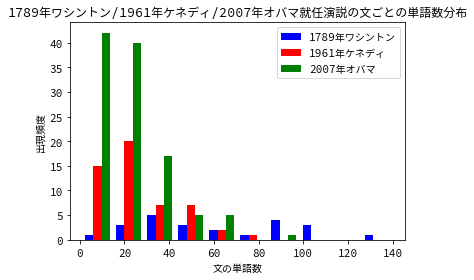

In [57]:
# -*- coding: utf-8 -*-
# リスト 4-1(2) 文に分割し、さらに単語に分割して数える例
import matplotlib.pyplot as plt
import numpy as np
import nltk
from nltk.corpus import inaugural
from collections import Counter
sents_Washington = nltk.tokenize.sent_tokenize(inaugural.raw('1789-Washington.txt'))
sents_Kennedy= nltk.tokenize.sent_tokenize(inaugural.raw('1961-Kennedy.txt'))
sents_Obama = nltk.tokenize.sent_tokenize(inaugural.raw('2009-Obama.txt'))

cnt_Washington = Counter(len(sent.split()) for sent in sents_Washington)
cnt_Kennedy = Counter(len(sent.split()) for sent in sents_Kennedy)
cnt_Obama = Counter(len(sent.split()) for sent in sents_Obama)
print('1文に含まれる形態素数（頻度順）：ワシントン大統領の演説')
print(sorted(cnt_Washington.items(), key=lambda x: [x[1], x[0]], reverse=True))
print('1文に含まれる形態素数（頻度順）：ケネディ大統領の演説')
print(sorted(cnt_Kennedy.items(), key=lambda x: [x[1], x[0]], reverse=True))
print('1文に含まれる形態素数（頻度順）：オバマ大統領の演説')
print(sorted(cnt_Obama.items(), key=lambda x: [x[1], x[0]], reverse=True))

nstring_Washington = np.array( [len(sent.split()) for sent in sents_Washington] )
nstring_Kennedy = np.array( [len(sent.split()) for sent in sents_Kennedy] )
nstring_Obama = np.array( [len(sent.split()) for sent in sents_Obama] )

plt.hist([nstring_Washington, nstring_Kennedy, nstring_Obama],
          color=['blue', 'red', 'green'],
          label=['1789年ワシントン', '1961年ケネディ', '2007年オバマ'])
plt.title('1789年ワシントン/1961年ケネディ/2007年オバマ就任演説の文ごとの単語数分布')

plt.xlabel('文の単語数')
plt.ylabel('出現頻度')
plt.legend()
plt.show()

### MeCab（IPA辞書）をWindowsに入れるためにやったことリスト
1. MeCabのインストール
 - 参考ＵＲＬ：[http://memopy.blogspot.jp/2017/11/pythonwindowsmecab.html]
 - 64bit版(mecab-0.996-64.exe)のインストール：[https://github.com/ikegami-yukino/mecab/releases]
 - UTF-8を選択。（そうしないと、ファイルの入出力による操作がきかなくなると思われる。）
 - 生成される「\sdk」直下を「C:\Program Files (x86)\MeCab\sdk」へコピー。（これを設定して動いたので、多分かなり重要。）
1. Pathを通す
 - 「コントロールパネル」の「システムの詳細設定」から「環境変数」を設定できる。
 - 「Path」に「C:\MeCab\bin」 を追加。
 - 後からpython連携させるときに必要なので「MECABRC」に「C:\MeCab\etc\mecabrc」も追加。
1. Visual Studioのインストール
 - Visual Studio 2017 Communityを入れた。[https://www.visualstudio.com/ja/thank-you-downloading-visual-studio/?sku=Community&rel=15]
 - C++を使える環境があれば、やらなくてもよい？
1. pip install mecab-python-windows
 - 参考ＵＲＬ：[https://qiita.com/yukinoi/items/990b6933d9f21ba0fb43]

上記の内、重要なのは①、④。場合によっては②③は省略できるのかも。
- 本家ＵＲＬ：[http://taku910.github.io/mecab/]


### MeCabの使い方
1. 分かち書きモード：入力文を分かち書きする。    
分かち書きした文章は、英語と同じように処理ができるだろう。
 - 書き方：mecab -Owakati -o <outputfile> <inputfile>
1. 語の情報を列挙する：分かち書きした上で、「元の語、読み、原形、品詞情報、追加の情報」の形に纏める。
 - 書き方①：-Ochasen（形態素解析プログラムChaSenと互換の出力）
 - 書き方②：-Odump（全情報を出力）

In [63]:
# MeCabによる形態素解析
from aozora import Aozora
import re
import MeCab
import numpy as np
import matplotlib.pyplot as plt

m = MeCab.Tagger("-Ochasen") # MeCabのインスタンスを作りmとする
out = m.parse("すもももももももものうち") # 入力stringをm.parseで分解する
print(out)

xlist = [u.split() for u in out.splitlines()]
xlist

すもも	スモモ	すもも	名詞-一般		
も	モ	も	助詞-係助詞		
もも	モモ	もも	名詞-一般		
も	モ	も	助詞-係助詞		
もも	モモ	もも	名詞-一般		
の	ノ	の	助詞-連体化		
うち	ウチ	うち	名詞-非自立-副詞可能		
EOS



[['すもも', 'スモモ', 'すもも', '名詞-一般'],
 ['も', 'モ', 'も', '助詞-係助詞'],
 ['もも', 'モモ', 'もも', '名詞-一般'],
 ['も', 'モ', 'も', '助詞-係助詞'],
 ['もも', 'モモ', 'もも', '名詞-一般'],
 ['の', 'ノ', 'の', '助詞-連体化'],
 ['うち', 'ウチ', 'うち', '名詞-非自立-副詞可能'],
 ['EOS']]

In [69]:
# 品詞情報のまとめ方
# 場合によっては、細かい品詞情報はいらないだろう。例えば、「名詞-一般」は「名詞」だけでよい。
# あと、EOSがリストに含まれるとfor文でエラーになる。EOSを除外する処理も必要。
testlist = []
for u in xlist:
    testlist.append(u[3])
testcnt = Counter(testlist)
testcnt

Counter({'名詞-一般': 3, '助詞-係助詞': 2, '助詞-連体化': 1, '名詞-非自立-副詞可能': 1})

In [58]:
# -*- coding: utf-8 -*-
# リスト 4-2 文書全体を単語に分解し、出現頻度を数えるプログラム例
from collections import Counter
from aozora import Aozora
import MeCab
 
aozora = Aozora("wagahaiwa_nekodearu.txt")
string = '\n'.join(aozora.read())     # 1つの文字列データにする
 
# 形態素解析して、語の出現頻度を数える
m = MeCab.Tagger("-Ochasen")          # MeCabで単語に分割する
mecablist = []
wlist = m.parse(string).splitlines()  # 結果を単語情報リストのリストに整形する
for u in wlist:
    xlist = []
    for v in u.split():
        xlist.append(v)
    mecablist.append(xlist)

# 得られた単語情報リストのリストから、単語の部分だけを取り出したリストを作る
wordbodylist = []
for u in mecablist:
    wordbodylist.append(u[0])
# 単語のリストで出現頻度を数える
cnt = Counter(wordbodylist)
# 頻度順に100個表示
print(sorted(cnt.items(), key=lambda x: x[1], reverse=True)[:100])

[('の', 9193), ('。', 7486), ('て', 6873), ('、', 6773), ('は', 6424), ('に', 6267), ('を', 6071), ('と', 5515), ('が', 5339), ('た', 3987), ('で', 3805), ('「', 3238), ('」', 3238), ('も', 2474), ('ない', 2391), ('だ', 2367), ('し', 2326), ('から', 2041), ('ある', 1731), ('な', 1611), ('ん', 1568), ('か', 1530), ('いる', 1251), ('事', 1207), ('へ', 1034), ('する', 998), ('う', 992), ('もの', 981), ('君', 973), ('です', 973), ('云う', 937), ('主人', 932), ('よう', 696), ('ね', 682), ('この', 649), ('御', 636), ('ば', 617), ('人', 602), ('その', 576), ('一', 554), ('そう', 554), ('何', 539), ('なる', 529), ('さ', 512), ('よ', 509), ('なら', 483), ('吾輩', 482), ('い', 476), ('ます', 458), ('じゃ', 448), ('…', 433), ('これ', 414), ('記号-空白', 409), ('なっ', 404), ('それ', 386), ('来', 364), ('れ', 356), ('見', 350), ('でも', 348), ('時', 344), ('迷亭', 343), ('――', 333), ('ませ', 330), ('いい', 320), ('ところ', 315), ('まで', 313), ('方', 312), ('三', 311), ('二', 302), ('ず', 299), ('上', 294), ('まし', 289), ('寒月', 286), ('顔', 282), ('ぬ', 277), ('先生', 274), ('見る', 273), ('人間', 272), 

1文の中に含まれる形態素数を頻度順に並び替える
[(12, 360), (10, 359), (8, 355), (9, 352), (11, 346), (14, 337), (13, 331), (7, 325), (15, 307), (16, 301), (19, 280), (6, 271), (18, 271), (17, 254), (20, 252), (21, 242), (22, 213), (5, 203), (23, 192), (26, 185), (24, 185), (27, 168), (29, 167), (25, 166), (28, 153), (4, 151), (30, 144), (31, 132), (33, 116), (32, 114), (35, 108), (34, 102), (37, 98), (39, 96), (38, 95), (36, 91), (41, 80), (40, 77), (44, 69), (42, 66), (43, 57), (45, 52), (46, 52), (48, 44), (47, 44), (53, 44), (52, 39), (3, 38), (50, 38), (54, 30), (51, 30), (56, 30), (49, 25), (55, 24), (60, 23), (62, 23), (57, 19), (61, 19), (66, 18), (58, 18), (59, 17), (64, 17), (65, 14), (67, 14), (2, 13), (70, 13), (79, 13), (68, 11), (63, 11), (72, 11), (69, 8), (77, 8), (80, 8), (76, 8), (86, 7), (73, 6), (78, 6), (75, 6), (71, 6), (82, 5), (81, 5), (74, 4), (87, 4), (83, 4), (85, 4), (88, 3), (105, 3), (95, 3), (108, 3), (100, 3), (103, 3), (93, 3), (89, 2), (160, 2), (197, 2), (91, 2), (104, 2), (

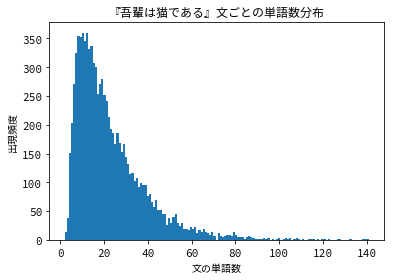

In [60]:
# -*- coding: utf-8 -*-
# リスト 4-3  文ごとに単語に分解し、出現頻度を数えるプログラム例
from collections import Counter
import re
import numpy as np
import matplotlib.pyplot as plt
from aozora import Aozora
import MeCab
 
aozora = Aozora("wagahaiwa_nekodearu.txt")
 
# 入力テキストを文に分解する。単純に'。'で分割する
string = '\n'.join(aozora.read())
string = re.sub('　', '', string)
string = re.split('。(?!」)|\n', re.sub('　', '', string))
while '' in string:  string.remove('')      # 空行を除く

# 文ごとに形態素解析して、文当たりの語の数を数える
m = MeCab.Tagger("-Ochasen")                # MeCabで単語に分割する
wordcountlist = []
for sentense in string:
    mecablist = []
    wlist = m.parse(sentense).splitlines()  # 結果を単語情報リストのリストに整形する
    for u in wlist:
        xlist = []
        for v in u.split():
            xlist.append(v)
        mecablist.append(xlist)
    # 得られた単語情報リストのリストから、単語の部分だけを取り出したリストを作る
    wordbodylist = []
    for u in mecablist:
        wordbodylist.append(u[0])
    # 単語数のリストを作る
    wordcountlist.append(len(wordbodylist))

cnt = Counter(wordcountlist)
# 結果をカウント数の降順にソート
print('1文の中に含まれる形態素数を頻度順に並び替える')
print(sorted(cnt.items(), key=lambda x: x[1], reverse=True)[:100])
u = np.array(wordcountlist)
nstring = u[ np.where(u < 150) ]
plt.hist(nstring, bins=nstring.max())
plt.title('『吾輩は猫である』文ごとの単語数分布')
plt.xlabel('文の単語数')
plt.ylabel('出現頻度')
plt.show()

### N-gram
- N-gramを切り出して出現頻度を数えるプログラム(文字列)
- N-gramを切り出して出現頻度を数えるプログラム(JEITA)
- 任意のN-gramの検索方法
- N-gramを用いた文章自動生成

In [29]:
# -*- coding: utf-8 -*-
# リスト 5-1  N-gram を切り出して出現回数を数えるプログラム例
from collections import Counter
import numpy as np
string = "吾輩は猫である。名前はまだ無い。"
delimiter = ['「', '」', '…', '　']
 
doublets = list(zip(string[:-1], string[1:])) #「最後の1文字除いた文字列」「最初の1文字除いた文字列」を組み合わせるとバイグラムになる。
# doubletsの各バイグラムのうち、delimiterを含むバイグラムを除去する。
doublets = filter((lambda x: not((x[0] in delimiter) or (x[1] in delimiter)) ),  \
                  doublets)
 
triplets = list(zip(string[:-2], string[1:-1], string[2:]))
triplets = filter((lambda x: not((x[0] in delimiter) or (x[1] in delimiter) or \
                                 (x[2] in delimiter))), triplets)
 
dic2 = Counter(doublets)
for k,v in sorted(dic2.items(), key=lambda x:x[1], reverse=True)[:50] :
    print(k, v)

dic3 = Counter(triplets)
for k,v in sorted(dic3.items(), key=lambda x:x[1], reverse=True)[:50] :
    print(k, v)

('吾', '輩') 1
('輩', 'は') 1
('は', '猫') 1
('猫', 'で') 1
('で', 'あ') 1
('あ', 'る') 1
('る', '。') 1
('。', '名') 1
('名', '前') 1
('前', 'は') 1
('は', 'ま') 1
('ま', 'だ') 1
('だ', '無') 1
('無', 'い') 1
('い', '。') 1
('吾', '輩', 'は') 1
('輩', 'は', '猫') 1
('は', '猫', 'で') 1
('猫', 'で', 'あ') 1
('で', 'あ', 'る') 1
('あ', 'る', '。') 1
('る', '。', '名') 1
('。', '名', '前') 1
('名', '前', 'は') 1
('前', 'は', 'ま') 1
('は', 'ま', 'だ') 1
('ま', 'だ', '無') 1
('だ', '無', 'い') 1
('無', 'い', '。') 1


In [25]:
# -*- coding: utf-8 -*-
# リスト 5-2  JEITA コーパスから単語 N-gram 頻度データを生成するプログラム例
# 気を付けるべきは、JEITAのコーパスデータは予め形態素解析済なため、実際に使う際は形態素解析したリスト型を別途用意。
from collections import Counter
import numpy as np
from numpy.random import *
import nltk
from nltk.corpus.reader.chasen import *
from nltk.corpus import jeita
# JEITAコーパスデータの読み込み
string = jeita.words('a1000.chasen')
delimiter = ['「', '」', '…', '　']  # N-gramデータで対象外にする文字のリスト

doublets = list(zip(string[:-1], string[1:]))
doublets = filter((lambda x: not((x[0] in delimiter) or (x[1] in delimiter)) ), \
                   doublets)

triplets = list(zip(string[:-2], string[1:-1], string[2:]))
triplets = filter((lambda x: not((x[0] in delimiter) or (x[1] in delimiter) or \
                                 (x[2] in delimiter))), triplets)
dic2 = Counter(doublets)  # 2-gramの出現回数リスト
dic3 = Counter(triplets)  # 3-gramの出現回数リスト

for u,v in sorted(dic2.items(), key=lambda x:x[1], reverse=True)[:10]:
    print(u, v)
for u,v in sorted(dic3.items(), key=lambda x:x[1], reverse=True)[:10]:
    print(u, v)

('た', '。') 10
('写生', '文') 8
('で', 'ある') 8
('で', 'あっ') 7
('派', 'の') 6
('長塚', '節') 6
('あっ', 'た') 6
('ある', '。') 6
('し', 'た') 5
('て', 'い') 5
('で', 'あっ', 'た') 6
('で', 'ある', '。') 5
('写生', '文', '派') 5
('あっ', 'た', '。') 4
('、', '写生', '文') 4
('長塚', '節', 'は') 3
('『', 'アララギ', '』') 3
('て', 'い', 'た') 3
('文', '派', 'の') 3
('の', 'こと', 'は') 2


In [27]:
#n-gramの検索の仕方

# dic2に検索対象のデータ、words変数に検索したい言葉、を代入する。
# 手順としては、①形態素解析結果をstringに格納。②delimiterでノイズ除去した結果をdoubletsに格納。③Coutner(②)をdic2に。
string = jeita.words('a1000.chasen')
delimiter = ['「', '」', '…', '　']  # N-gramデータで対象外にする文字のリスト
doublets = list(zip(string[:-1], string[1:]))
doublets = filter((lambda x: not((x[0] in delimiter) or (x[1] in delimiter)) ), doublets)
dic2 = Counter(doublets)  
words = ['', '子規'] 

# filter関数を使って検索する。
# xにはdic2の各値がxとして代入されていく。代入値のイメージは、辞書型{('ありふれ', 'た'): 1, ...}
# lambda x:x[0][0]の意味は、最初の[0]で辞書の各キーを参照し、次の[0]で、n-gramの第一項の値を参照する。
# それがwords変数のインデックス1の値と等しい時、結果をndarrayに格納していく。
matcheditems = np.array(list(filter( (lambda x: x[0][0] == words[1]), dic2.items() )) )  
matcheditems

array([[('子規', 'の'), 2],
       [('子規', 'が'), 2],
       [('子規', '、'), 1]], dtype=object)

In [53]:
# （参考）下記関数gennextの変数

probs = [row[1] for row in matcheditems]      # N-gram辞書の出現回数部分を取り出す
weightlist = rand(len(matcheditems)) * probs  # 乱数rand(項数)を要素ごとに掛ける
# 重み最大になる2-gramの2語目を取り出す
u = matcheditems[np.argmax(weightlist)][0][1]

print('probs:' + str(probs))
print('weightlist:' + str(weightlist))
print('np.argmax(weightlist):' + str(np.argmax(weightlist)))
print('u:' + str(u))

probs:[2, 2, 1]
weightlist:[0.4251938  0.47035817 0.87292106]
np.argmax(weightlist):2
u:、


In [168]:
# n-gramを持ちいた文章生成プログラム（上のdic2またはdic3変数を利用する。）
# words変数を変えれば、異なる文頭で文章生成できる。
# 処理する度に異なる結果が得られることを確認しよう。

def gennext(words, dic):  # N-gram辞書dicと直前の1語/2語から、次の語を選んで返す
    grams = len(words)    # 2-gramか3-gramかを、与えたwordが2語か3語かによって決める
    if grams==2:
        matcheditems = np.array(list(filter( (lambda x: x[0][0] == words[1]),
              dic.items() )) )  # 2-gramの第2項がほしい語words[1]であるものを集める
    else:
        matcheditems = np.array(list(filter(
             # 3-gramの第2・3項がほしい語words[1], words[2]であるものを集める
             (lambda x: x[0][0] == words[1]) and (lambda x: x[0][1] == words[2]),
              dic.items() )) )
    if (len(matcheditems) == 0):  # ほしい語のパターンがN-gram辞書にない場合は中止する
        print("No matched generator for", words[1])
        return ''
    probs = [row[1] for row in matcheditems]      # N-gram辞書の出現回数部分を取り出す
    weightlist = rand(len(matcheditems)) * probs  # 乱数rand(項数)を要素ごとに掛ける
    if grams==2:
        # 重み最大になる2-gramの2語目を取り出す
        u = matcheditems[np.argmax(weightlist)][0][1]
    else:
        # 重み最大になる3-gramの3語目を取り出す
        u = matcheditems[np.argmax(weightlist)][0][2]
    return u
# 以下メインプログラム 
#words = ['', '子規']       # 2-gramのときの初期シーケンス
words = ['', '子規', 'の']  # 3-gramのときの初期シーケンス
output = words[1:]          # 出力outputの先頭に初期シーケンスを埋め込む
for i in range(50):         # 最大で50語まで生成（「。」などが来れば停止）
    if len(words) == 2:
        newword = gennext(words, dic2)     # 2-gram時の次の語の生成
    else:
        newword = gennext(words, dic3)     # 3-gram時の次の語の生成
    output.append(newword)                 # 出力シーケンスoutputに次の語を加える
    if newword in ['', '。', '？', '！']:  # 次の語が終端なら生成終了
        break
    words = output[-len(words):]           # 次のgentextの入力を準備する
for u in output:
    print(u, end='')

子規の人々が、自然主義である。

### ネットーワーク分析（共起）

pair frequency [(('十', '年'), 23), (('(', ')'), 18), (('二', '年'), 13), (('二', '十'), 12), (('二', '万'), 12), (('七', '十'), 11), (('七', '年'), 11), (('三', '年'), 11), (('五', '年'), 10), (('四', '万'), 10), (('二', '四'), 10), (('子ども', 'たち'), 10), (('四', '十'), 9), (('二', '〇'), 9), (('万', '人'), 8), (('一', '円'), 8), (('万', '円'), 8), (('私', 'たち'), 7), (('安倍', '内閣'), 7), (('十', '五'), 7), (('兆', '円'), 7), (('事業', '者'), 7), (('店', 'ジーンズ'), 7), (('ため', '改革'), 7), (('年', '四'), 7), (('たち', '未来'), 6), (('日', '的'), 6), (('平和', '的'), 6), (('十', 'こと'), 6), (('二', '二'), 6)]


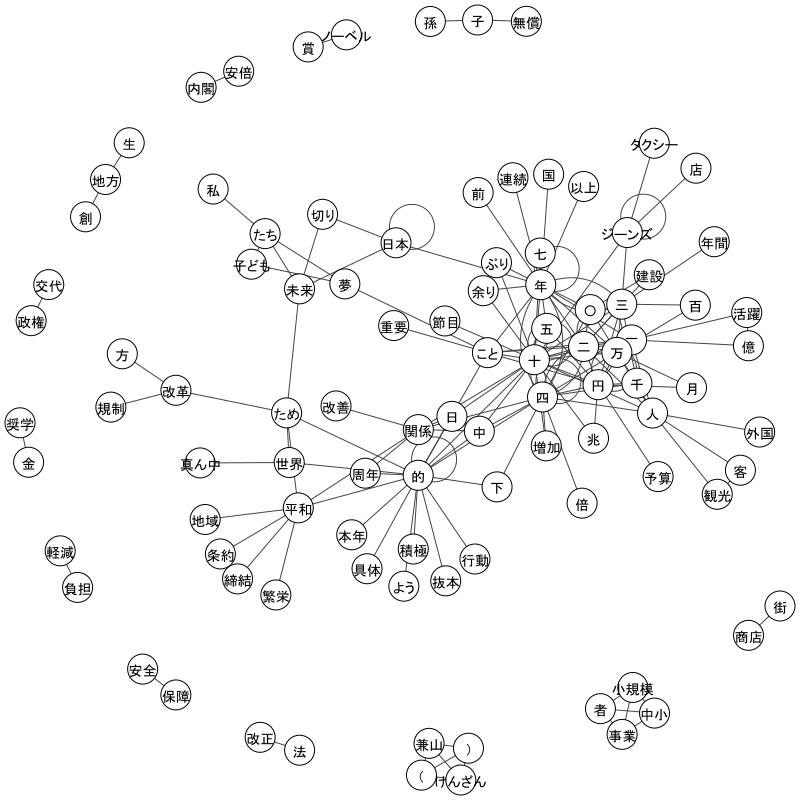

In [4]:
# -*- coding: utf-8 -*-
# リスト 5-6 施政方針演説のネットワークの構造を分析する例
# minfreqを4以上にしないといけないのでは？
import re
import numpy as np
from collections import Counter
import MeCab
import itertools
from igraph import *
from aozora import Aozora
minfreq = 4                   # グラフ描画のときは4に設定し、見やすくする
m = MeCab.Tagger("-Ochasen")  # MeCabで品詞分解する
 
def readin(filename):
    with open(filename, "r", encoding='utf-8') as afile:
        whole_str = afile.read()
    sentenses = (re.sub('。', '。\n', whole_str)).splitlines()
    return [re.sub('　', '', u) for u in sentenses if len(u)!=0]
 
filename = "abe.txt"
string = readin(filename)
 
# 文単位で形態素解析し、名詞だけ抽出し、基本形を文ごとのリストにする
sentensemeishilist = [ \
    [v.split()[2] for v in m.parse(sentense).splitlines() \
       if (len(v.split())>=3 and v.split()[3][:2]=='名詞')] \
    for sentense in string]

# 文ごとにペアリストを作る
doubletslist = [ \
    list(itertools.combinations(meishilist,2)) \
       for meishilist in sentensemeishilist if len(meishilist) >=2 ]
alldoublets = []
for u in doubletslist:  # 文ごとのペアリストのリストをフラットなリストにする
    alldoublets.extend(u)

# 名詞ペアの頻度を数える
dcnt = Counter(alldoublets)

# 出現頻度順にソートした共起ペアを出力する（上位30ペア）
print('pair frequency', sorted(dcnt.items(), key=lambda x: x[1], \
      reverse=True)[:30]) # 頻度順に表示
# 名詞ペアの頻度辞書から、頻度が4以上のエントリだけを抜き出した辞書を作る
restricteddcnt = dict( ( (k, dcnt[k]) for k in dcnt.keys() if dcnt[k]>=minfreq ) )
charedges = restricteddcnt.keys()
vertices = list(set( [v[0] for v in charedges] + [v[1] for v in charedges] ))
 
# charedgesは(['名詞','名詞'])の形なのでvertid(数字)ペア([1,3])に変換する
edges = [(vertices.index(u[0]), vertices.index(u[1])) for u in charedges]

g = Graph(vertex_attrs={"label": vertices, "name": vertices}, \
          edges=edges, directed=False)
plot(g, vertex_size=30, bbox=(800,800), vertex_color='white')

In [32]:
# （参考）上記セルの変数
print('文毎の名詞リスト:\r\n' + str(sentensemeishilist[:3]))
print('文毎の共起名詞リスト:\r\n' + str(doubletslist[0]))

文毎の名詞リスト:
[['冒頭', '天皇陛下', '公務', '負担', '軽減', '等'], ['現在', '有識者', '会議', '検討', '論点', '整理', '予定'], ['静か', '環境', '中', '国民', '的', '理解', '下', '成案', '考え']]
文毎の共起名詞リスト:
[('冒頭', '天皇陛下'), ('冒頭', '公務'), ('冒頭', '負担'), ('冒頭', '軽減'), ('冒頭', '等'), ('天皇陛下', '公務'), ('天皇陛下', '負担'), ('天皇陛下', '軽減'), ('天皇陛下', '等'), ('公務', '負担'), ('公務', '軽減'), ('公務', '等'), ('負担', '軽減'), ('負担', '等'), ('軽減', '等')]


### python-igraphをwindowsにインストールする
実はpythonの標準ライブラリでは用意されておらず、Rで使われているigraphを利用するため、かなり手間がかかる。

手順
1. msys2をインストールする。x86_64が64bit版。 http://www.msys2.org/
1. cairoを入れる。    
MSYS上でのコマンド：pacman -S mingw64/mingw-w64-x86_64-cairo
1. pycairoをインストールする。 対象ファイル例：pycairo‑1.16.3‑cp36‑cp36m‑win_amd64.whl     
1. python-igraphをインストールする。対象ファイル例：python_igraph‑0.7.1.post6‑cp36‑cp36m‑win_amd64.whl
1. pip install pydot, pip install pydotplus, pip install graphviz, pip install pygraphvizを実行する。 

注意点
- pipでigraphをインストールすると、jgraphという謎のライブラリを入れることになる。名前がシンプルすぎて別のライブラリと衝突しているらしい。ここでいれたいのは、正式名称はpython-igraphである。

参考URL：http://hytmachineworks.hatenablog.com/entry/2017/04/22/171620  
③④のインストーラー: https://www.lfd.uci.edu/~gohlke/pythonlibs/#python-igraph

In [ ]:
# iterableからlength文の要素を取り出し、まとめ直す（重複除外）。
# 例：itertools.combinations('ABCD', 2) --> AB AC AD BC BD CD
itertools.combinations(iterable, length)

### 潜在的意味解析モデル
- gensimモジュール

In [1]:
# -*- coding: utf-8 -*-
# リスト 2-7  潜在的意味解析モデルを使って話題を抽出するプログラム例
# LSALDAやWord2Vec等のライブラリを含むgensim
# 細かい説明は以下参照。http://hivecolor.com/id/58
from gensim import corpora, models, similarities
# textsをあらかじめ準備しておく（分かち書き文のリスト）
num_topics = 3
documents = ["Human machine interface for lab abc computer applications",
             "A survey of user opinion of computer system response time",
             "The EPS user interface management system",
             "System and human system engineering testing of EPS",
             "Relation of user perceived response time to error measurement",
             "The generation of random binary unordered trees",
             "The intersection graph of paths in trees",
             "Graph minors IV Widths of trees and well quasi ordering",
             "Graph minors A survey"]
stoplist = set('for a of the and to in'.split()) #集合を手っ取り早く創りたい時、この書き方意外と役立つかも。
#分かち書きに相当する処理。stoplistsの形態素は無視する。
texts = [[word for word in document.lower().split() if word not in stoplist]
         for document in documents]
# remove words that appear only once
# 空リスト[]にtextsのリストを足して、tokensをまとめる。
all_tokens = sum(texts, [])
#set(all_tokens) #typeを出したいとき
tokens_once = set(word for word in set(all_tokens) if all_tokens.count(word) == 1)
texts = [[word for word in text if word not in tokens_once]
         for text in texts]

dictionary = corpora.Dictionary(texts)  # 入力textsリストをdictionaryに変換。トークンをまとめる。
#dictionary.save_as_text('./dictionary.dict') #dictionaryをテキストファイルに書き出し。
corpus = [dictionary.doc2bow(text) for text in texts]  # corpusを作成
#tfidfの計算方法は以下参照。http://tawara.hatenablog.com/entry/2016/11/08/021408
tfidf = models.TfidfModel(corpus)       # TFIDFモデルを作成
corpus_tfidf = tfidf[corpus]            # corpusをTF-IDFで重要語のみに変換
lsi = models.LsiModel(corpus_tfidf, id2word=dictionary, num_topics=num_topics)
                                        # corpus_tfidfからLSIモデルを作成
# トピックの表示
print(lsi.show_topics(num_topics, formatted=True))     # topicを表示
corpus_lsi = lsi[corpus_tfidf]          # corpus_tfidfのすべての文をLSIに変換
for doc in corpus_lsi:
    x = [ sorted(doc, key=lambda u: u[1], reverse=True) for u in doc if len(u)!=0]
    print(x)

D:\0.programs\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


[(0, '0.703*"trees" + 0.538*"graph" + 0.402*"minors" + 0.187*"survey" + 0.061*"system" + 0.060*"response" + 0.060*"time" + 0.058*"user" + 0.049*"computer" + 0.035*"interface"'), (1, '0.460*"system" + 0.373*"user" + 0.332*"eps" + 0.328*"interface" + 0.320*"response" + 0.320*"time" + 0.293*"computer" + 0.280*"human" + 0.171*"survey" + -0.161*"trees"'), (2, '0.456*"time" + 0.456*"response" + -0.352*"eps" + -0.340*"human" + -0.318*"interface" + -0.277*"system" + 0.272*"survey" + 0.213*"user" + -0.183*"trees" + 0.114*"minors"')]
[[(1, 0.5200703306361845), (0, 0.06600783396090529), (2, -0.37649581219168893)], [(1, 0.5200703306361845), (0, 0.06600783396090529), (2, -0.37649581219168893)], [(1, 0.5200703306361845), (0, 0.06600783396090529), (2, -0.37649581219168893)]]
[[(1, 0.7609563167700035), (2, 0.5080674581001661), (0, 0.19667592859142588)], [(1, 0.7609563167700035), (2, 0.5080674581001661), (0, 0.19667592859142588)], [(1, 0.7609563167700035), (2, 0.5080674581001661), (0, 0.196675928591425

In [40]:
# corpusの見方
# dictionary.doc2bow(text)でcorpusが纏められる。
# 入力したtextがdictionaryにあるかどうかチェックする。なければ無視される。
# あれば (dictionaryのID, 出現回数) の形でまとめられる。
corpus

[[(0, 1), (1, 1), (2, 1)],
 [(0, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)],
 [(2, 1), (5, 1), (7, 1), (8, 1)],
 [(1, 1), (5, 2), (8, 1)],
 [(3, 1), (6, 1), (7, 1)],
 [(9, 1)],
 [(9, 1), (10, 1)],
 [(9, 1), (10, 1), (11, 1)],
 [(4, 1), (10, 1), (11, 1)]]

### 自然言語処理
- NLTKモジュール

In [8]:
# 自然言語処理のパッケージNLTK
# ダウンロードしたいコーパス等を選ぶ。
# 基本はCollcetionstタブのbookをダウンロードすればよい。
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [8]:
# -*- coding: utf-8 -*-
# 2.5.2節  NLTK に含まれるコーパスデータ　　NTLKのデータを表示する
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [12]:
# 中身を表示する。
c = 0
for u in text7:
    print(u, end=' ')
    if u=='.':
        print()
    c += 1
    if c == 99: #全編だと長いので途中で止める。
        break

Pierre Vinken , 61 years old , will join the board as a nonexecutive director Nov. 29 . 
Mr. Vinken is chairman of Elsevier N.V. , the Dutch publishing group . 
Rudolph Agnew , 55 years old and former chairman of Consolidated Gold Fields PLC , was named *-1 a nonexecutive director of this British industrial conglomerate . 
A form of asbestos once used * * to make Kent cigarette filters has caused a high percentage of cancer deaths among a group of workers exposed * to it more than 30 years ago , researchers reported 0 *T*-1 . 


In [25]:
# 1789年のワシントン大統領の就任演説のテキスト
from nltk.corpus import inaugural
inaugural.raw('1789-Washington.txt')[:775] #全編だと長いので途中で止める。

'Fellow-Citizens of the Senate and of the House of Representatives:\n\nAmong the vicissitudes incident to life no event could have filled me with greater anxieties than that of which the notification was transmitted by your order, and received on the 14th day of the present month. On the one hand, I was summoned by my Country, whose voice I can never hear but with veneration and love, from a retreat which I had chosen with the fondest predilection, and, in my flattering hopes, with an immutable decision, as the asylum of my declining years -- a retreat which was rendered every day more necessary as well as more dear to me by the addition of habit to inclination, and of frequent interruptions in my health to the gradual waste committed on it by time. On the other hand,'

In [26]:
# 日本語のコーパスを参照する。
from nltk.corpus import jeita
jeita.readme()
#jeita.fileids() #コメントアウトを外すと,利用可能なコーパス名の一覧が得られる。

'\nJEITA Public Morphologically Tagged Corpus (in ChaSen format)\nJEITA 形態素解析済みコーパス (ChaSen 形式)\n\nCreated and distributed by Masato Hagiwara (http://lilyx.net/)\n作成＆配布 萩原 正人 (http://lilyx.net/)\n\n* About this corpus - 本コーパスについて\n\nThis copurs, JEITA Public Morphologically Tagged Corpus (in ChaSen format), is a public, automatically tagged (morphologically analyzed) corpus of Project Sugita Genpaku (http://www.genpaku.org/) and Aozora Bunko (http://www.aozora.gr.jp/), which themselves are freely available text collections like Project Gutenberg. The corpus data is originally distributed as "JEITA Public Morphologically Tagged Corpus" here:\n\n本コーパス 「JEITA 形態素解析済みコーパス (ChaSen 形式)」は、プロジェクト杉田玄白 (http://www.genpaku.org/) と青空文庫 (http://www.aozora.gr.jp/) のテキストを自動で形態素解析した、フリーで利用可能なタグ付きコーパスです。本コーパスは、本来、「JEITA 形態素解析済みコーパス」として、以下のページにおいて配布されているデータに基づいています。\n\nhttp://nlp.kuee.kyoto-u.ac.jp/NLP_Portal/jeita_corpus/index.html\n\nbut the files included in this copurs are not the original distribut

In [13]:
for word in jeita.words('g0173.chasen'):
    print(word, end=' ')

アメリカ 　 ペンシルバニア 　 ゲティスバーグ 近く の 戦場 にて ８７ 年 前 に 、 われわれ の 祖先 は この 大陸 に 新た な 国 を 作り上げ まし た 。 その 国 は 自由 という 理念 の 上 に 打ち立て られ 、 全て の 人 は 生まれながら に し て 平等 で ある という 考え に 捧げ られ て い まし た 。 いま われわれ は 大きな 内戦 の さなか に い ます 。 この 国 が 、 と いう より 自由 という 理念 の 上 に 打ち立て られ 、 全て の 人 は 生まれながら に し て 平等 で ある という 考え に 捧げ られ た 国 が 、 永続 する か どう か を 試さ れ て いる の です 。 われわれ は 、 この 戦争 の 激戦 の 戦場 に 集まっ て い ます 。 われわれ は 、 この 国 が 生き 永らえる よう 、 ここ で 命 を 投げ た した 人々 にとって 、 この 戦場 の 一部 を 最終 的 な 安息 の 地 として 捧げる ため に やってき まし た 。 われわれ が こう す べき な の は 、 まったく 正しく 適切 で あり ます 。 しかし 、 より 大きな 意味 で とらえれ ば 、 われわれ に は 捧げる こと は でき ませ ん 、 われわれ に は 呈 する こと は でき ませ ん 、 つまり われわれ に は この 地 を 捧げる こと は でき ない の です 。 勇敢 なる 者 で 、 生き残っ た に せよ 、 戦死 し た に せよ 、 ここ で 奮闘 し た もの だけ が 、 この 土地 を 捧げ て き た の です 。 われわれ の 微力 で は 、 それ に つけ加え たり 減じ たり する こと は でき ない の です 。 世界 は ここ で われわれ が 言っ た こと に は たいして 注意 を 払い も し なけれ ば 、 後世 まで 記憶 する こと も ない でしょ う 。 しかし 勇敢 なる もの が ここ で なしとげ た こと は 、 決して 忘れ られる こと は ない の です 。 ここ で 戦っ た もの が これ まで 気高く 推し進め て き た 未完 の 仕事 に 、 ここ で 新た に 身 

### 形態素解析器janome参考URL:   
[http://mocobeta.github.io/janome/]

In [2]:
# 文字化けする場合は、print(str(token).decode('utf8))などを試す。
from janome.tokenizer import Tokenizer
t = Tokenizer()
for token in t.tokenize('すもももももももものうち'):
    print(token)

すもも	名詞,一般,*,*,*,*,すもも,スモモ,スモモ
も	助詞,係助詞,*,*,*,*,も,モ,モ
もも	名詞,一般,*,*,*,*,もも,モモ,モモ
も	助詞,係助詞,*,*,*,*,も,モ,モ
もも	名詞,一般,*,*,*,*,もも,モモ,モモ
の	助詞,連体化,*,*,*,*,の,ノ,ノ
うち	名詞,非自立,副詞可能,*,*,*,うち,ウチ,ウチ


In [3]:
# tfのワードカウント
# TokenCountFilter(att='base_form)とすると基本形の数を調べる。
from janome.tokenizer import Tokenizer
from janome.analyzer import Analyzer
from janome.tokenfilter import *

text = 'すもももももももものうち'
token_filters = [POSKeepFilter('名詞'), TokenCountFilter()]
a = Analyzer(token_filters=token_filters)
for k, v in a.analyze(text):
    print('%s: %d' % (k, v))

すもも: 1
もも: 2
うち: 1


In [4]:
# 分かち書きモード
# 表層形のみを返す
# 分かち書きモードしか使わないということであれば、下記のように書くとメモリを節約できる。
#t = Tokenizer(wakati=True)
t = Tokenizer()
tokens = t.tokenize('分かち書きモードがつきました！', wakati=True)
tokens

['分かち書き', 'モード', 'が', 'つき', 'まし', 'た', '！']

### 便利なライブラリ
- twython:twitterの情報を取得するためのライブラリ。Twitter Developerの登録が必要？